### Import libraries





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from pandas_profiling import ProfileReport
%matplotlib inline



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset 

In [ ]:
data = '../data/weatherAUS.csv'
df = pd.read_csv(data)

In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)

### Exploratory Data Analysis



#### Dataset Overview

In [ ]:
df.shape

(142193, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# Statistic properties of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


#### Univariate Analysis

##### Explore **RainTomorrow** target variable

Check for missing value

In [ ]:
df['RainTomorrow'].isnull().sum()

0

View unique values

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

View the frequency distribution of values

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

View percentage of frequency distribution of values

In [ ]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Visualize frequency distribution of **RainTomorrow** variable

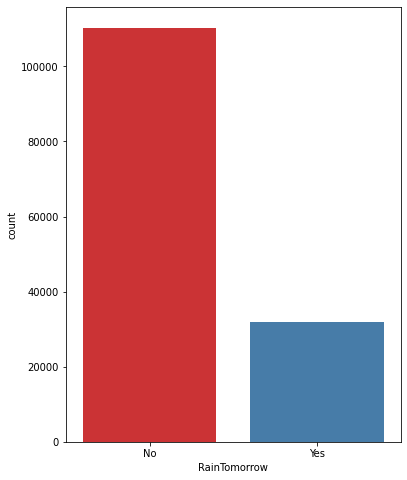

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Explore Categorical Variables

In [ ]:

categorical = [col for col in df.columns if df[col].dtypes == 'O']

categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Check for missing values

In [ ]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Frequency count of categorical variables

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

2016-05-17    49
2014-11-06    49
2013-07-31    49
2013-11-27    49
2013-06-17    49
              ..
2007-11-16     1
2007-11-25     1
2008-01-15     1
2007-12-10     1
2007-11-05     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964

Number of labels in categorical variables

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


###### Explore **Location** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')


Location contains 49 labels


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.Location.value_counts(normalize=True)

Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Ballarat            0.021295
Launceston          0.021295
Albany              0.021211
Albury              0.021175
MelbourneAirport    0.021161
PerthAirport        0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera             0.021028
Cobar               0.021014
Cairns              0.021014
Wollongong          0.020979
GoldCoast           0.020957
WaggaWagga          0.020929
NorfolkIsland       0.020845
Penrith             0.020845
Newcastle           0.020782
SalmonGums          0.020782
CoffsHarbour  

Visualize frequency distribution

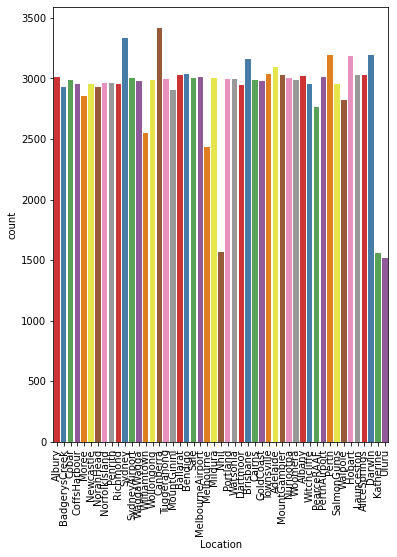

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Location", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindGustDir** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindGustDir contains', len(df.WindGustDir.unique()), 'labels')


WindGustDir contains 17 labels


In [ ]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindGustDir.value_counts(normalize=True)

W      0.073610
SE     0.070065
E      0.068273
N      0.067987
SSE    0.067686
S      0.067355
WSW    0.066994
SW     0.066211
SSW    0.064804
WNW    0.060709
NW     0.060235
ENE    0.060152
ESE    0.054981
NE     0.053137
NNW    0.049382
NNE    0.048418
Name: WindGustDir, dtype: float64

Visualize frequency distribution

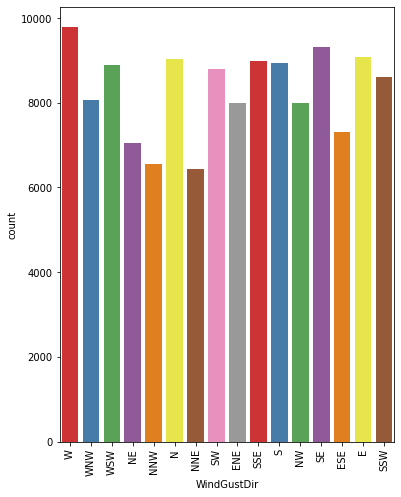

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindGustDir", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindDir9am** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindDir9am contains', len(df.WindDir9am.unique()), 'labels')


WindDir9am contains 17 labels


In [ ]:
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindDir9am.value_counts(normalize=True)

N      0.086193
SE     0.069315
E      0.068271
SSE    0.067832
NW     0.064700
S      0.064253
W      0.062491
SW     0.062317
NNE    0.060130
NNW    0.059313
ENE    0.058519
ESE    0.057180
NE     0.056945
SSW    0.056347
WNW    0.054426
WSW    0.051770
Name: WindDir9am, dtype: float64

Visualize frequency distribution

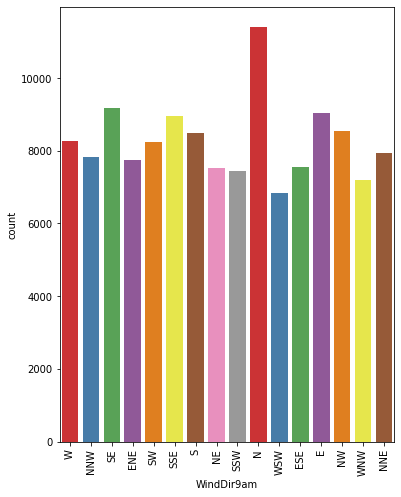

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir9am", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **WindDir3pm** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('WindDir3pm contains', len(df.WindDir3pm.unique()), 'labels')


WindDir3pm contains 17 labels


In [ ]:
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

Check frequency distribution of values 

In [ ]:
df.WindDir3pm.value_counts(normalize=True)

SE     0.077036
W      0.071604
S      0.069342
WSW    0.067399
SW     0.066337
SSE    0.066048
N      0.062616
WNW    0.062537
NW     0.061178
ESE    0.060557
E      0.060268
NE     0.058982
SSW    0.057869
NNW    0.055868
ENE    0.055803
NNE    0.046556
Name: WindDir3pm, dtype: float64

Visualize frequency distribution

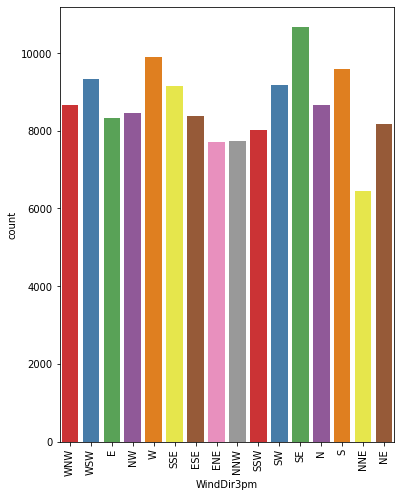

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="WindDir3pm", data=df, palette="Set1")
plt.xticks(rotation=90)

plt.show()

###### Explore **RainToday** variable

Check for number of labels and unique values

In [ ]:
# print number of labels in Location variable

print('RainToday contains', len(df.WindDir9am.unique()), 'labels')


RainToday contains 17 labels


In [ ]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

Check frequency distribution of values 

In [ ]:
df.RainToday.value_counts(normalize=True)

No     0.776577
Yes    0.223423
Name: RainToday, dtype: float64

Visualize frequency distribution

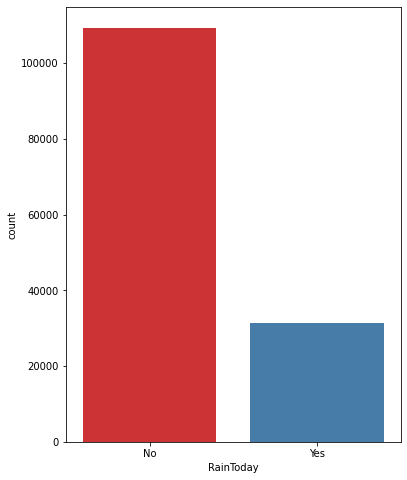

In [ ]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

##### Explore Numerical Variables

In [ ]:
# display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# view the numerical variables
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Summary of numerical variables** 

* There are 16 numerical variables.
* These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
* All of the numerical variables are of continuous type.

**Check for missing values in numerical variables**

In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

**Outliers in numerial variables**

View summary statistics in numerical variables

In [ ]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
count  141556.0  141871.0  140787.0  ...   85099.0  141289.0  139467.0
mean       12.0      23.0       2.0  ...       5.0      17.0      22.0
std         6.0       7.0       8.0  ...       3.0       6.0       7.0
min        -8.0      -5.0       0.0  ...       0.0      -7.0      -5.0
25%         8.0      18.0       0.0  ...       2.0      12.0      17.0
50%        12.0      23.0       0.0  ...       5.0      17.0      21.0
75%        17.0      28.0       1.0  ...       7.0      22.0      26.0
max        34.0      48.0     371.0  ...       9.0      40.0      47.0

[8 rows x 16 columns] 2


###### Draw boxplots to visualise outliers

Text(0, 0.5, 'WindSpeed3pm')

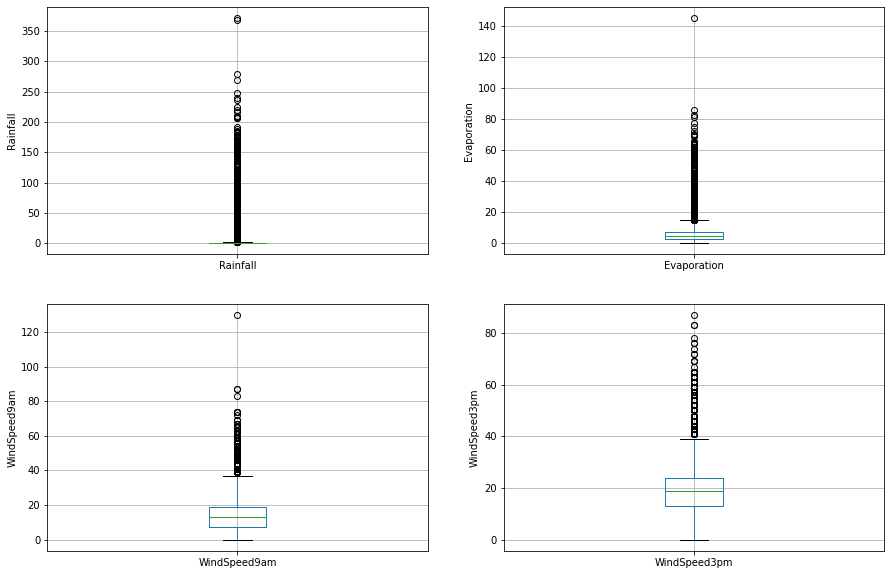

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'WindGustSpeed')

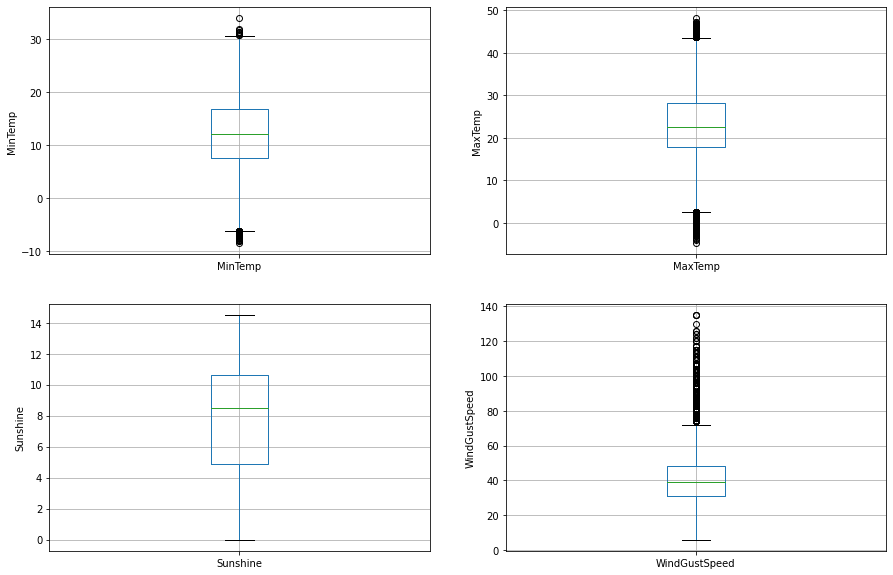

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(2,2,2)
fig = df.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

Text(0, 0.5, 'Pressure3pm')

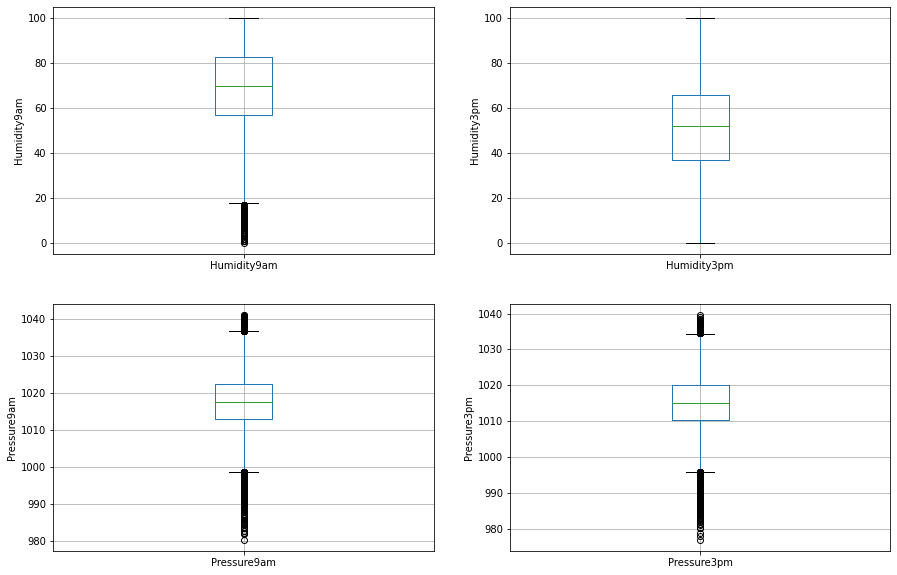

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

plt.subplot(2,2,2)
fig = df.boxplot(column='Humidity3pm')
fig.set_title('')
fig.set_ylabel('Humidity3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Pressure9am')
fig.set_title('')
fig.set_ylabel('Pressure9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Pressure3pm')
fig.set_title('')
fig.set_ylabel('Pressure3pm')

Text(0, 0.5, 'Temp3pm')

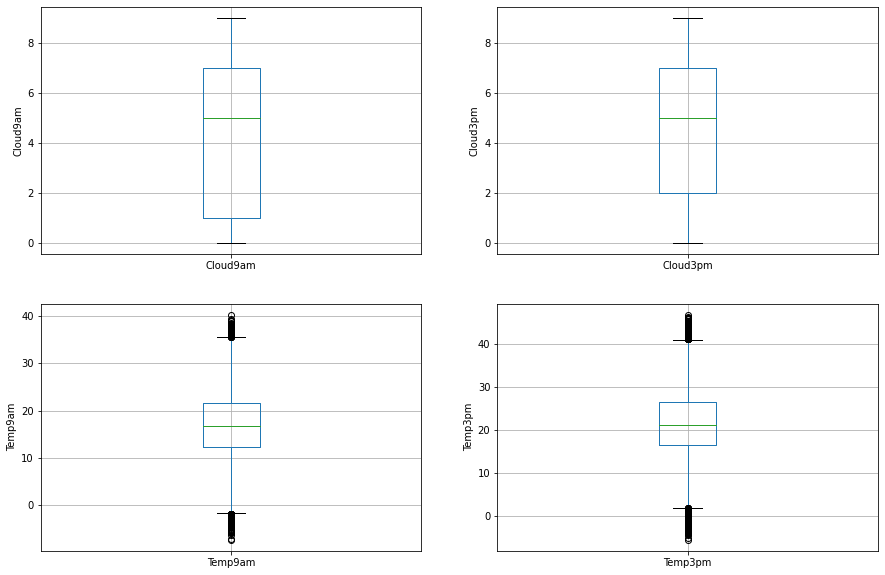

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Cloud9am')
fig.set_title('')
fig.set_ylabel('Cloud9am')

plt.subplot(2,2,2)
fig = df.boxplot(column='Cloud3pm')
fig.set_title('')
fig.set_ylabel('Cloud3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Temp3pm')
fig.set_title('')
fig.set_ylabel('Temp3pm')

###### Plot histogram to check for distribution

Text(0.5, 0, 'WindSpeed3pm')

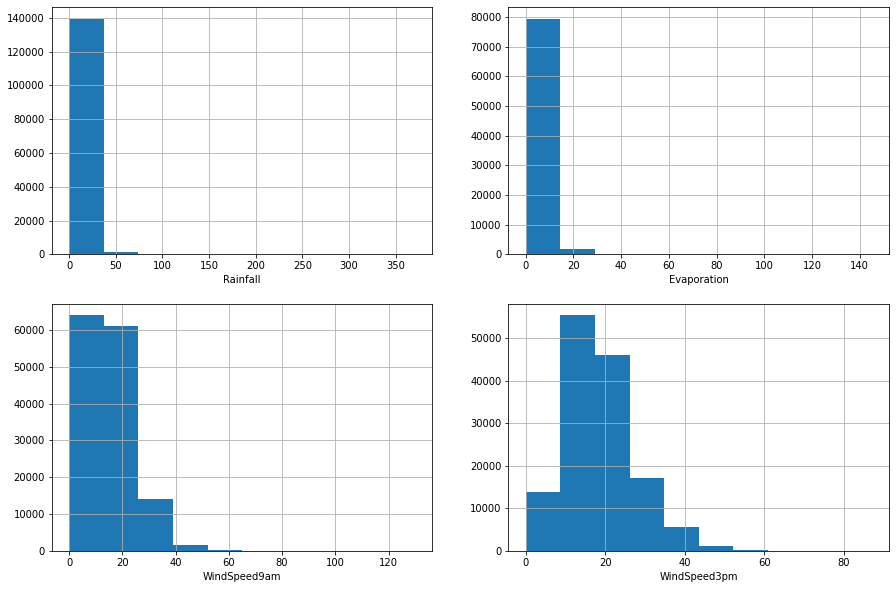

In [ ]:


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')



plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')



plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')



plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')


Text(0.5, 0, 'WindGustSpeed')

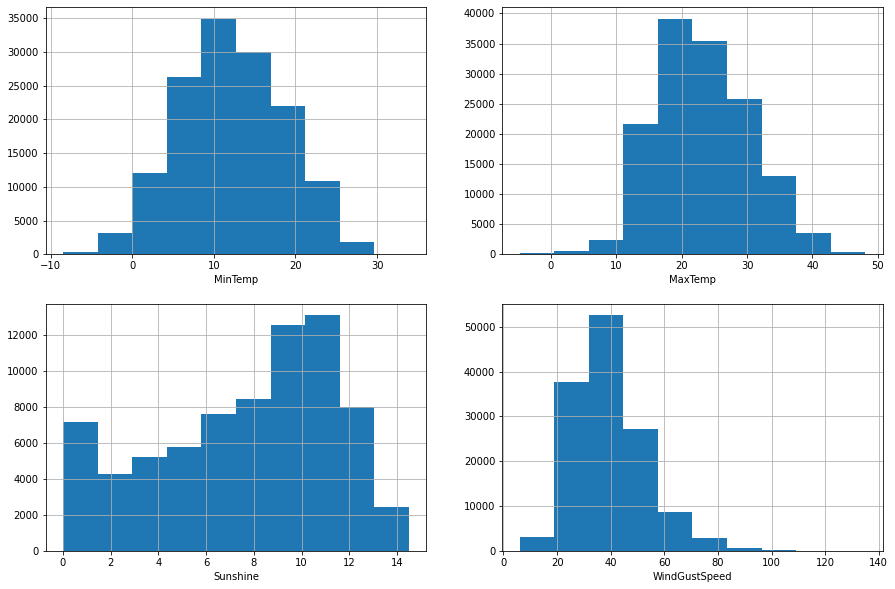

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.MinTemp.hist(bins=10)
fig.set_xlabel('MinTemp')



plt.subplot(2, 2, 2)
fig = df.MaxTemp.hist(bins=10)
fig.set_xlabel('MaxTemp')



plt.subplot(2, 2, 3)
fig = df.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')



plt.subplot(2, 2, 4)
fig = df.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')


Text(0.5, 0, 'Pressure3pm')

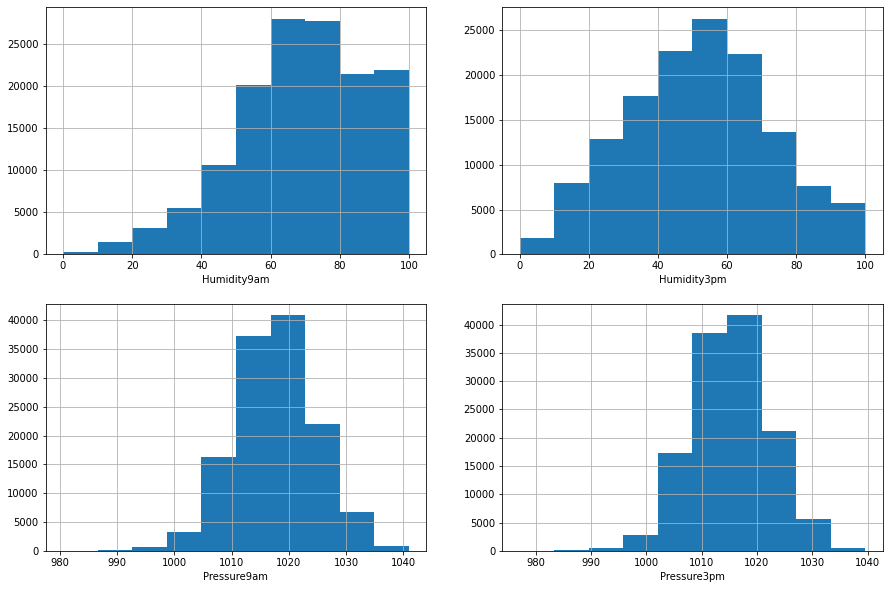

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Humidity9am.hist(bins=10)
fig.set_xlabel('Humidity9am')



plt.subplot(2, 2, 2)
fig = df.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity3pm')



plt.subplot(2, 2, 3)
fig = df.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure9am')



plt.subplot(2, 2, 4)
fig = df.Pressure3pm.hist(bins=10)
fig.set_xlabel('Pressure3pm')


Text(0.5, 0, 'Temp3pm')

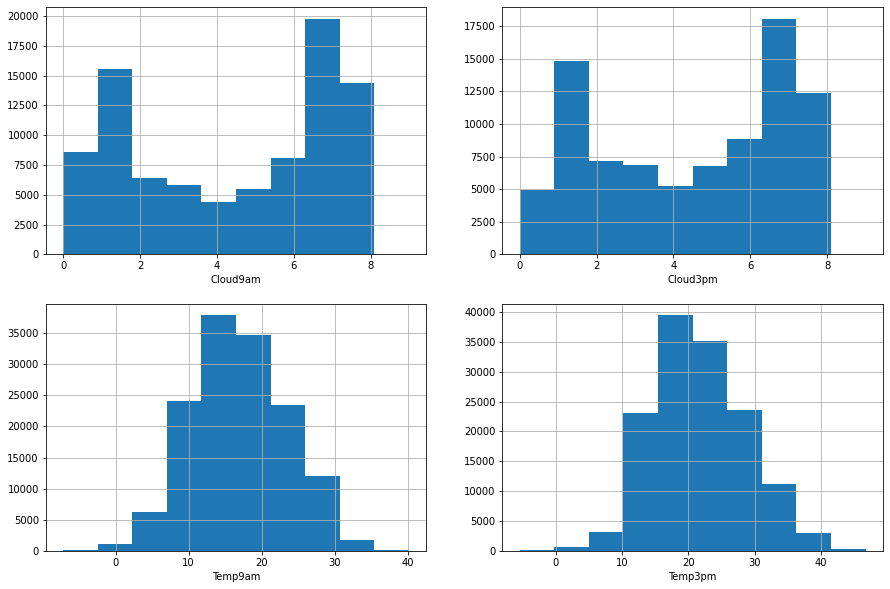

In [ ]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Cloud9am.hist(bins=10)
fig.set_xlabel('Cloud9am')



plt.subplot(2, 2, 2)
fig = df.Cloud3pm.hist(bins=10)
fig.set_xlabel('Cloud3pm')



plt.subplot(2, 2, 3)
fig = df.Temp9am.hist(bins=10)
fig.set_xlabel('Temp9am')



plt.subplot(2, 2, 4)
fig = df.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')


#### Multivariate Analysis

##### Scatter plot to show relationship between variables and target variable

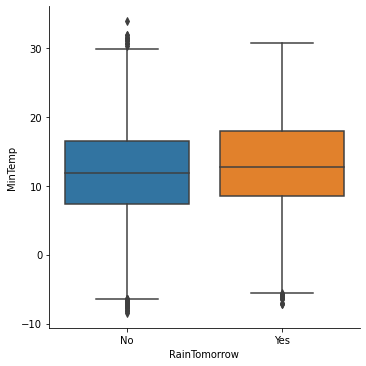

In [ ]:
sns.catplot(x="RainTomorrow", y="MinTemp", kind="box", data=df)

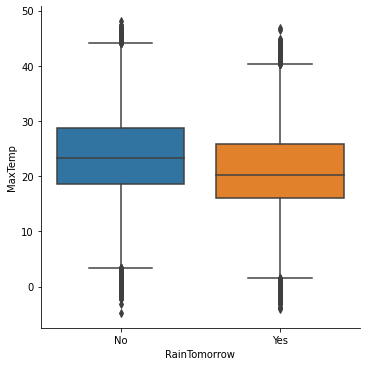

In [ ]:
sns.catplot(x="RainTomorrow", y="MaxTemp", kind="box", data=df)

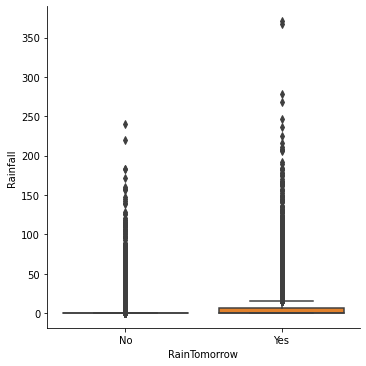

In [ ]:
sns.catplot(x="RainTomorrow", y="Rainfall", kind="box", data=df)

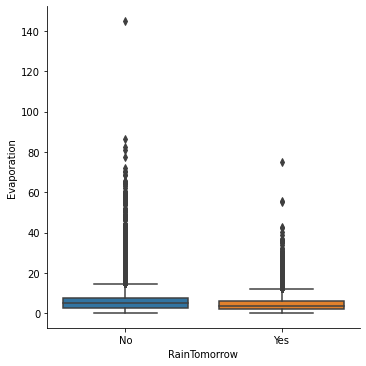

In [ ]:
sns.catplot(x="RainTomorrow", y="Evaporation", kind="box", data=df)

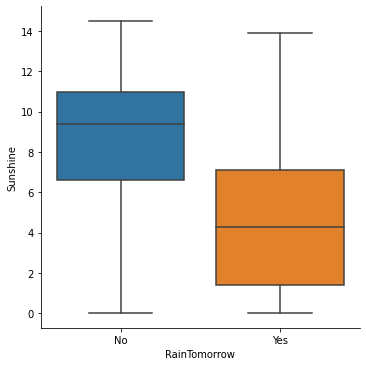

In [ ]:
sns.catplot(x="RainTomorrow", y="Sunshine", kind="box", data=df)

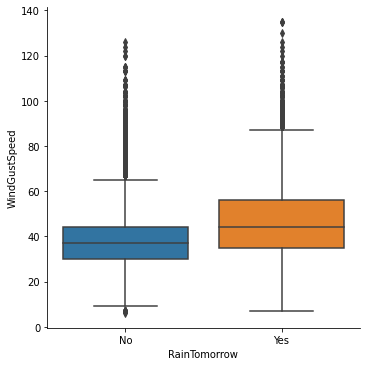

In [ ]:
sns.catplot(x="RainTomorrow", y="WindGustSpeed", kind="box", data=df)

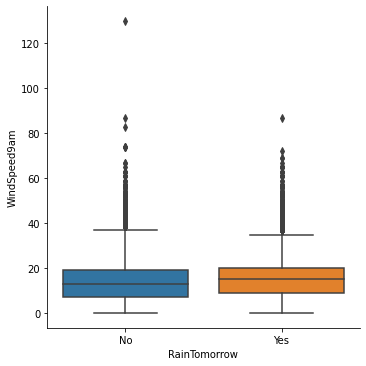

In [ ]:
sns.catplot(x="RainTomorrow", y="WindSpeed9am", kind="box", data=df)

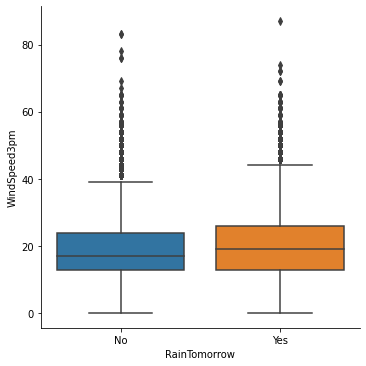

In [ ]:
sns.catplot(x="RainTomorrow", y="WindSpeed3pm", kind="box", data=df)

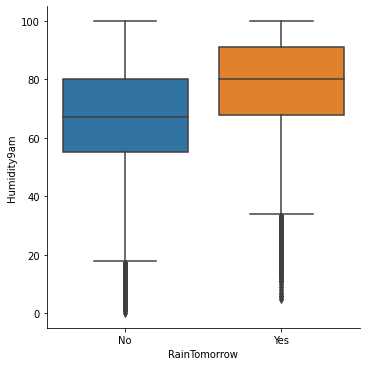

In [ ]:
sns.catplot(x="RainTomorrow", y="Humidity9am", kind="box", data=df)

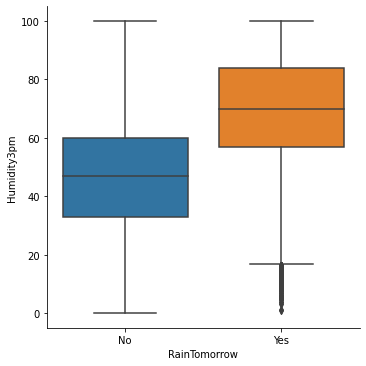

In [ ]:
sns.catplot(x="RainTomorrow", y="Humidity3pm", kind="box", data=df)

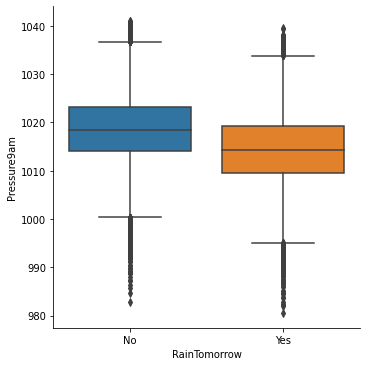

In [ ]:
sns.catplot(x="RainTomorrow", y="Pressure9am", kind="box", data=df)

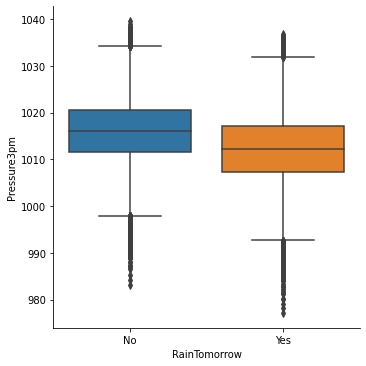

In [ ]:
sns.catplot(x="RainTomorrow", y="Pressure3pm", kind="box", data=df)

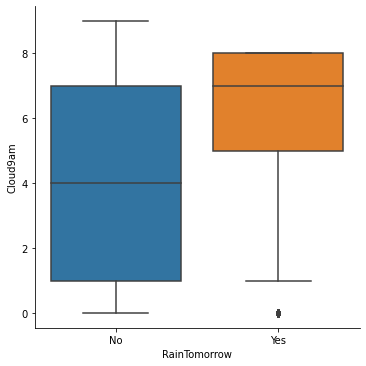

In [ ]:
sns.catplot(x="RainTomorrow", y="Cloud9am", kind="box", data=df)

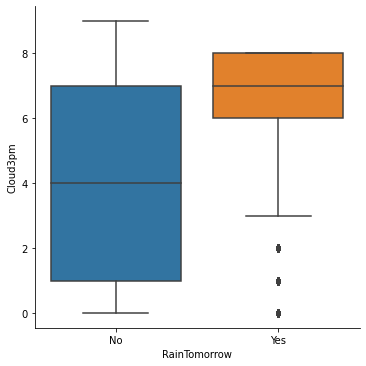

In [ ]:
sns.catplot(x="RainTomorrow", y="Cloud3pm", kind="box", data=df)

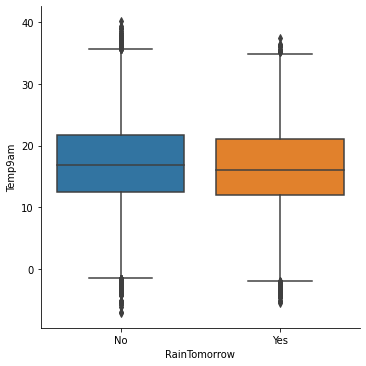

In [ ]:
sns.catplot(x="RainTomorrow", y="Temp9am", kind="box", data=df)

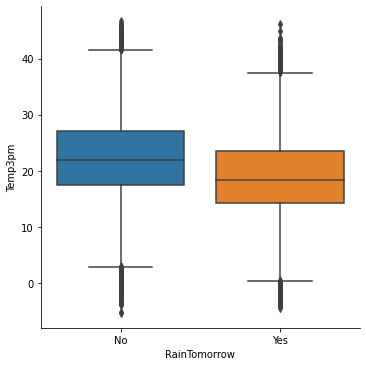

In [ ]:
sns.catplot(x="RainTomorrow", y="Temp3pm", kind="box", data=df)

##### Heat Map

In [ ]:
correlation = df.corr()

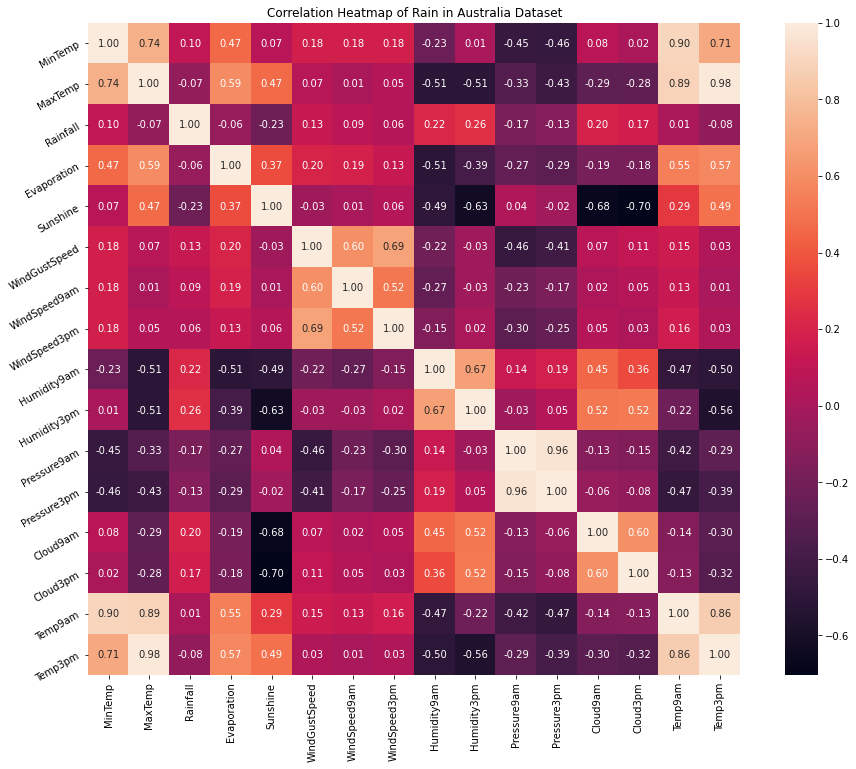

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation
* MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

* MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

* MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

* MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

* WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

* Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

* Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).